Task 5: Decision Trees and Random Forests


In [2]:
#load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


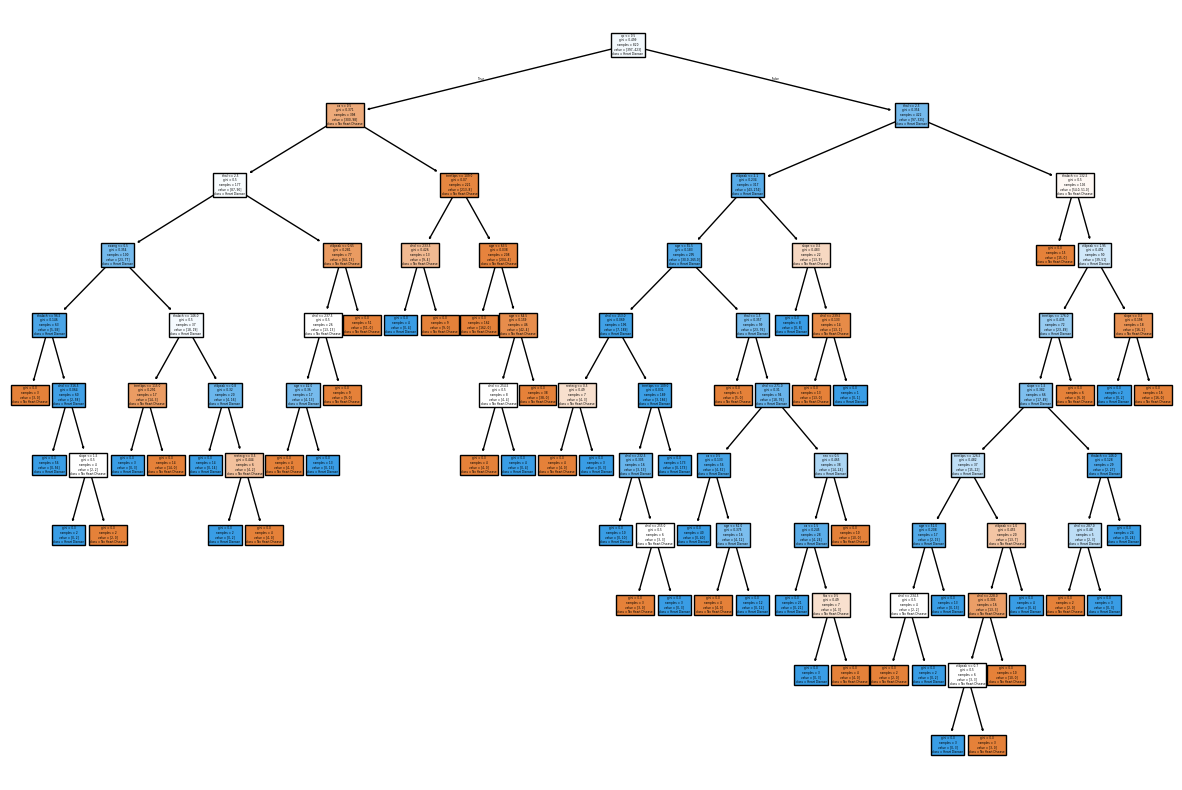

In [7]:
#1. Train a Decision Tree Classifier and Visualize the Tree
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()

In [8]:
#2. Analyze Overfitting and Control Tree Depth

# Unrestricted tree
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)
print("Unrestricted Tree - Train Acc:", train_acc, "Test Acc:", test_acc)

# Limited depth tree
dtree_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_limited.fit(X_train, y_train)

train_acc_lim = dtree_limited.score(X_train, y_train)
test_acc_lim = dtree_limited.score(X_test, y_test)
print("Limited Depth Tree - Train Acc:", train_acc_lim, "Test Acc:", test_acc_lim)


Unrestricted Tree - Train Acc: 1.0 Test Acc: 0.9853658536585366
Limited Depth Tree - Train Acc: 0.8829268292682927 Test Acc: 0.8


In [9]:
#3. Train a Random Forest and Compare Accuracy

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest - Train Acc:", rf.score(X_train, y_train))
print("Random Forest - Test Acc:", rf.score(X_test, y_test))


Random Forest - Train Acc: 1.0
Random Forest - Test Acc: 0.9853658536585366


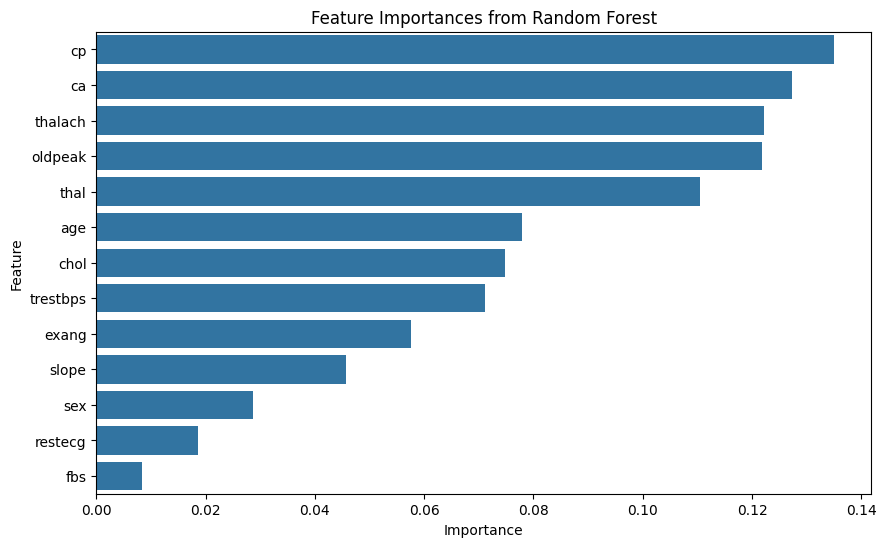

In [10]:
# 4. Interpret Feature Importances

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [11]:
#5. Evaluate Using Cross-Validation
# Cross-validation for Decision Tree
tree_cv_scores = cross_val_score(dtree_limited, X, y, cv=5)
print("Decision Tree CV Accuracy:", tree_cv_scores.mean())

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_cv_scores.mean())


Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073
